# Práctica de Clasificiación Binaria

Supervivientes del Titanic: [Descripción del dataset](https://www.kaggle.com/c/titanic/data)

### Interpretación de las columnas (el resto o no interesan o su significado es obvio):
- SibSp: número de hermanos + cónyuges a bordo. 	
- Parch: número de padres o hijos a bordo Titanic 
- Pclass: clase -> 1 (primera), 2 (segunda), 3 (tercera)	
- Fare: precio del pasaje 	
- Embarked: Puerto de embarque -> C = Cherbourg, Q = Queenstown, S = Southampton

### Montar Google Drive

### Importaciones

In [39]:
import numpy
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.keras.utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

### Carga del dataset: Titanic.csv

In [40]:
# 1.- Carga del dataset en un DataFrame de Pandas
df= pd.read_csv('/home/sergio/Documents/Cursos/Curso-Deep-Learning/Cuadernos/Prácticas/Titanic.csv')

# 2.- Mostrarlas cinco primeras filas del dataframe
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preparación de los datos

#### Selección de las columnas de interés:


In [41]:
# 3.- Modificar el DataFrame para que que solo contenga las columnas:
#       'Survived','Name','Pclass','Sex','Age','SibSp','parch','Fare' y 'Embarked'.
#     Confirmar los cambios mostrando de nuevo las cinco primeras filas.
df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)
df.head(5)



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### Aleatorización del DataFrame y preparación de los datos

In [42]:
# 4.- Usar el método 'sample' para aleatorizar el DataFrame
df.sample(frac=1, random_state=1)

# 5.- Eliminar la columna del nombre ('Name')
df.drop(['Name'], axis=1, inplace=True)


# 6.- Reemplazar los datos perdidos de la columna edad ('Age') con su promedio
df.fillna({'Age': df.Age.mean()}, inplace=True)


# 7.- Reemplazar nos datos perdidos de la columna pasaje ('Fare') con su promedio
df.fillna({'Fare': df.Fare.mean()}, inplace=True)

# 8.- Convertir los datos de la columna sexo ('Sex') en 0 para mujer ('female') y 1 para hombre ('male')
#     Usar la función map de Pandas.
df.Sex = df.Sex.map({'female': 0, 'male': 1})


# 9.- Reemplazar los datos perdidos de la columna 'Embarked' por 'S'
df.fillna({'Embarked': 'S'}, inplace=True)

# 10.- Usando la función map, reemplazar los valores de la columna 'Embarked' del siguiente modo:
#             'C' -> 0,  'Q' -> 1,  'S' -> 2
#             Los valores finales deben ser de tipo entero (int)
df.Embarked = df.Embarked.map({'C': 0, 'Q': 1, 'S': 2})
df= df.astype({'Embarked': 'int'})

# 11.- Extraer a un array de numpy los valores de todas las columnas excepto la de objetivo ('Survived')
X = df.drop(['Survived'], axis=1).values



# 12.- Extraer en un array de numpy la columna objetivo ('Survived')
y = df['Survived'].values




#### Generación de los conjuntos de entrenamiento y test

In [43]:
# 13.- Entrenamiento: 80% - Test: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)




### Construcción y compilación de la red

In [44]:
# 14.- Modelo:
#        - Tres capas densas (activación ReLU): 64,32 y 16 unidades
#        - Capa de salida con activación sigmoide
model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



# 15.- Compilación con los siguientes parámetros:
#        - Optimizador: Adam
#        - Métrica: Exactitud (accuracy)
#        - Función de pérdidas: deducirla
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/home/sergio/venv_dl/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Entrenamiento de la red

In [45]:
   print(X_train.shape)  # Debería mostrar algo como (n_samples, 8)

(712, 7)


In [46]:
# 16.- Entrenar con un 20% de datos para validación, 100 epochs y un tamaño de batch de 128 muestras.
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3666 - loss: 1.2117 - val_accuracy: 0.3217 - val_loss: 0.7499
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4955 - loss: 0.7264 - val_accuracy: 0.7483 - val_loss: 0.6312
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6790 - loss: 0.6479 - val_accuracy: 0.7413 - val_loss: 0.5886
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6780 - loss: 0.6364 - val_accuracy: 0.7203 - val_loss: 0.5759
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6741 - loss: 0.6234 - val_accuracy: 0.7273 - val_loss: 0.5643
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6568 - loss: 0.6298 - val_accuracy: 0.7273 - val_loss: 0.5572
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6847 - loss: 0.6237 - val_accuracy: 0.7692 - val_loss: 0.5478
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7044 - loss: 0.6056 - val_accuracy: 0.7832 - val_loss:

### Mostrar gráficas de evolución de las pérdidas y la exactitud (*accuracy*)

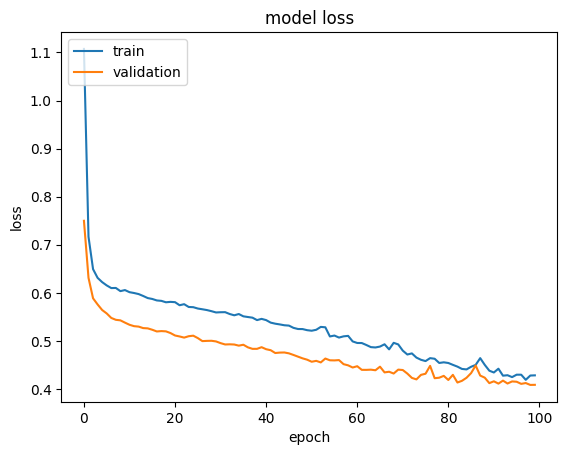

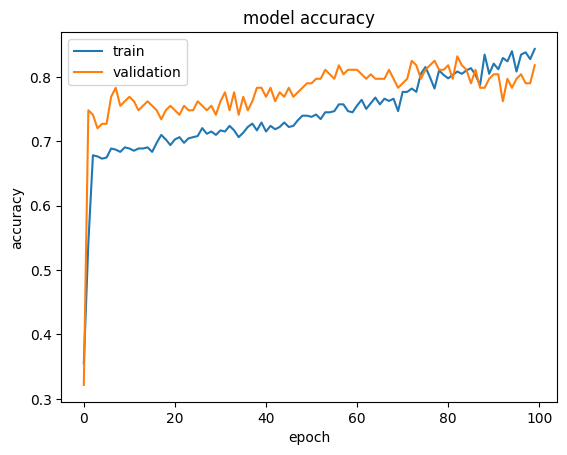

In [47]:
#17.- Graficas de pérdidas y exactitud ('accuracy')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()




### Evaluar el modelo

In [48]:
# 18.- Aplicamos el método evaluate sobre los datos de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7307 - loss: 0.5245 
Loss: 0.5158751010894775
Accuracy: 0.74301677942276
